 <img src='https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg' width='300' align='left'/>

---

# **Extraindo dados diretamente da API do Banco Central**

 <img src='https://files.sunoresearch.com.br/p/uploads/2018/01/bacen.jpg.jpg' width='300' align='left'/>



Documentação: https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88

Banco de Dados: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

# 0. Importar as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1.Extração dos dados

In [ ]:
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.1178/dados?formato=json&dataInicial=01/01/2010&dataFinal=31/12/2016'

In [ ]:
df = pd.read_json(url)

In [ ]:
df.set_index('data', inplace = True)

In [ ]:
df.head()

,valor
data,
31/12/2009,8.65
04/01/2010,8.65
05/01/2010,8.65
06/01/2010,8.65
07/01/2010,8.65


In [ ]:
df.index = pd.to_datetime(df.index, dayfirst= True)

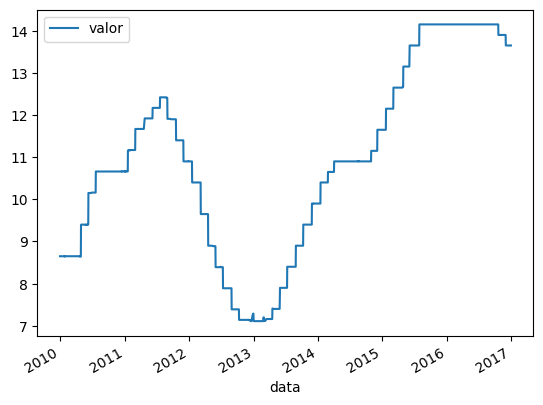

In [ ]:
df.plot();

# 2. Generalização da extração

In [ ]:
def extracao_bcb(codigo, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  df = pd.read_json(url)
  df.set_index('data', inplace = True)
  df.index = pd.to_datetime(df.index, dayfirst= True)
  return df

In [ ]:
extracao_bcb(433,'01/01/2010', '01/10/2023')

,valor
data,
2010-01-01,0.75
2010-02-01,0.78
2010-03-01,0.52
2010-04-01,0.57
2010-05-01,0.43
...,...
2023-05-01,0.23
2023-06-01,-0.08
2023-07-01,0.12


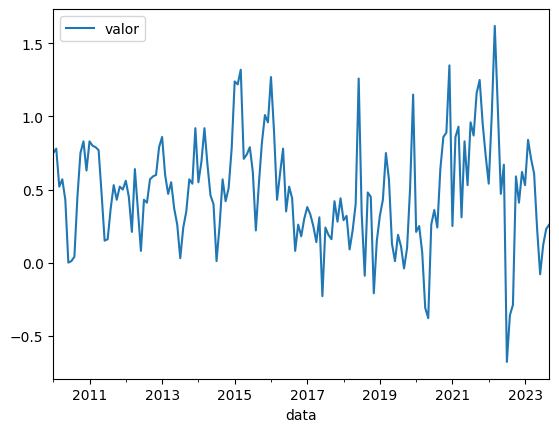

In [ ]:
extracao_bcb(433,'01/01/2010', '01/10/2023').plot();